# Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

# 1   Load and Explore Data

In [2]:
df=pd.read_excel("Tourism.xlsx",sheet_name="Tourism")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=df.copy()

In [4]:
data.shape

(4888, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

We have numerical and categorical values. Dataset has missing values as well

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [8]:
data.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
435,200435,1,33.0,Self Enquiry,1,21.0,Small Business,Male,2,3.0,Standard,3.0,Divorced,1.0,1,5,0,0.0,Senior Manager,28610.0
947,200947,1,52.0,Self Enquiry,3,11.0,Salaried,Male,3,3.0,Standard,4.0,Unmarried,1.0,1,4,1,1.0,Senior Manager,23446.0
1777,201777,0,38.0,Self Enquiry,1,31.0,Salaried,Female,2,4.0,Standard,4.0,Married,4.0,0,3,0,1.0,Senior Manager,27061.0
3026,203026,0,41.0,Company Invited,1,9.0,Small Business,Female,3,2.0,Deluxe,4.0,Divorced,3.0,0,3,0,2.0,Manager,22922.0
1467,201467,0,27.0,Self Enquiry,1,10.0,Salaried,Male,2,1.0,Deluxe,4.0,Married,2.0,1,4,1,0.0,Manager,21142.0
3513,203513,0,29.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,Basic,3.0,Married,3.0,0,4,0,2.0,Executive,20241.0
1907,201907,0,30.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,Basic,4.0,Single,1.0,0,1,0,0.0,Executive,17983.0
3486,203486,0,45.0,Company Invited,1,12.0,Salaried,Male,3,5.0,Basic,3.0,Unmarried,5.0,0,1,0,2.0,Executive,21840.0
1161,201161,0,38.0,Self Enquiry,1,8.0,Small Business,Female,2,4.0,Standard,3.0,Married,4.0,1,5,1,1.0,Senior Manager,22756.0
3128,203128,0,41.0,Self Enquiry,3,17.0,Small Business,Male,4,5.0,Standard,4.0,Married,4.0,0,4,1,2.0,Senior Manager,28383.0


Let us check null value count in individual variables

In [9]:
data['Age'].isnull().sum()

226

In [10]:
data['TypeofContact'].isnull().sum()

25

In [11]:
data['DurationOfPitch'].isnull().sum()

251

In [12]:
data['NumberOfFollowups'].isnull().sum()

45

In [13]:
data['NumberOfTrips'].isnull().sum()

140

In [14]:
data['NumberOfChildrenVisiting'].isnull().sum()

66

In [15]:
data['MonthlyIncome'].isnull().sum()

233

Multiple variables have null values in the given dataset

# 2   Data Pre-Processing

In [16]:
#Drop Customer ID as that is not much significant for model building
data.drop(['CustomerID'], axis=1,inplace=True)

In [17]:
data.duplicated().sum()

141

We have 141 duplicate records in the given data

In [18]:
data.sort_values("Age", inplace = True)

In [19]:
data[data.duplicated(keep=False)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
563,0,25.0,Self Enquiry,3,32.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,4,0,0.0,Manager,21180.0
2033,0,25.0,Self Enquiry,3,32.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,4,0,0.0,Manager,21180.0
1923,1,26.0,Company Invited,2,23.0,Salaried,Female,2,3.0,Basic,3.0,Married,1.0,1,5,0,1.0,Executive,17741.0
3007,0,26.0,Self Enquiry,3,33.0,Small Business,Fe Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,4,0,1.0,Manager,24858.0
453,1,26.0,Company Invited,2,23.0,Salaried,Female,2,3.0,Basic,3.0,Married,1.0,1,5,0,1.0,Executive,17741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,0,NaN,Self Enquiry,1,19.0,Salaried,Female,2,3.0,Basic,3.0,Single,4.0,0,3,1,0.0,Executive,18452.0
2189,0,NaN,Self Enquiry,3,10.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,1,3,1,1.0,Manager,NaN
2195,1,NaN,Self Enquiry,1,20.0,Salaried,Male,2,4.0,Basic,4.0,Married,2.0,1,5,1,1.0,Executive,NaN
2237,0,NaN,Self Enquiry,1,9.0,Salaried,Female,2,3.0,Deluxe,4.0,Single,4.0,0,4,1,0.0,Manager,NaN


In [20]:
#drop duplicate records
data.drop_duplicates(subset =None,keep ="first", inplace = True)

In [21]:
data.duplicated().sum()

0

In [22]:
data['Gender'].unique()

array(['Male', 'Female', 'Fe Male'], dtype=object)

Looks like Gender records have some typos and need to fix those

In [23]:
data['Gender'].replace(to_replace=['Fe Male'],value='Female',inplace=True)

# 3   EDA

Univariate analysis

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

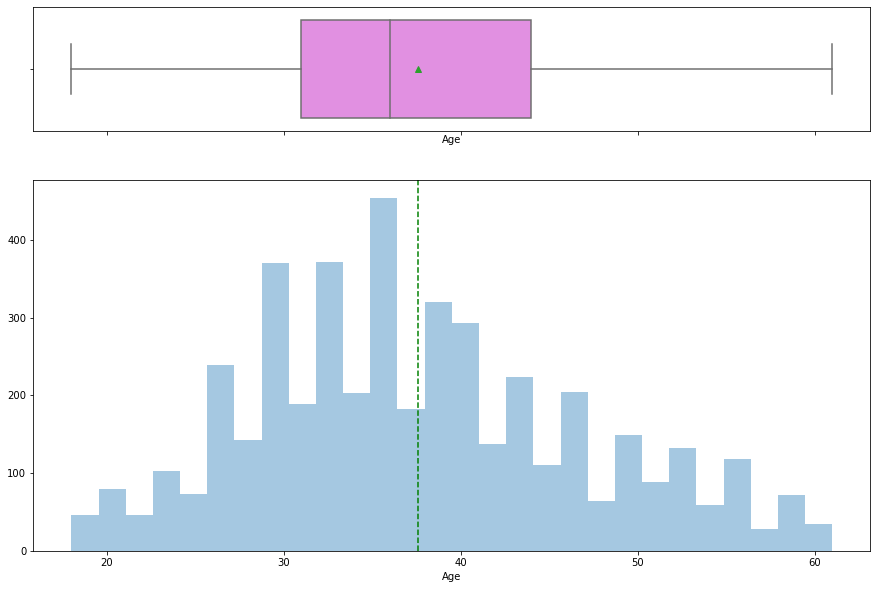

In [25]:
histogram_boxplot(data['Age'])

Customer Age groups are widely distributed and mean age is around 38

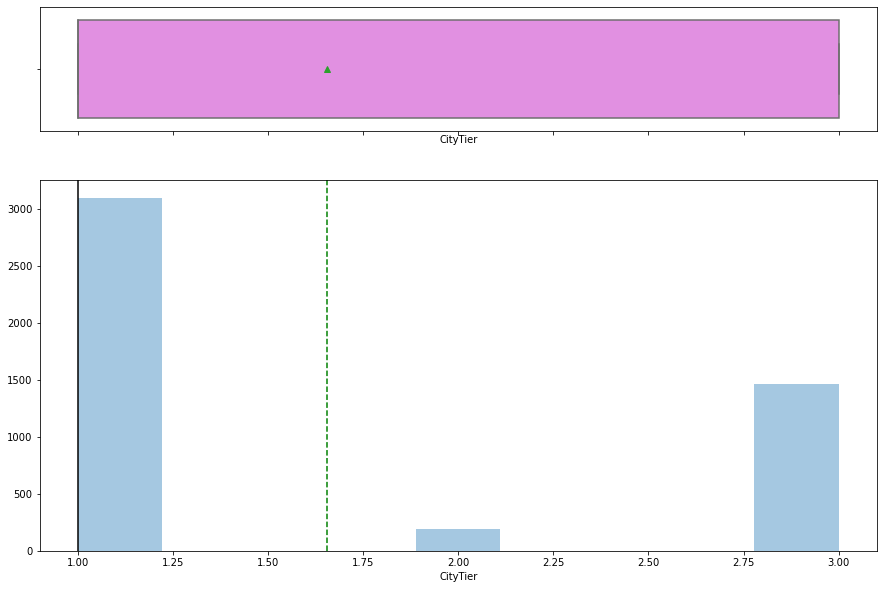

In [26]:
    histogram_boxplot(data['CityTier'])

Highest number of customers lives in tier 1 cities

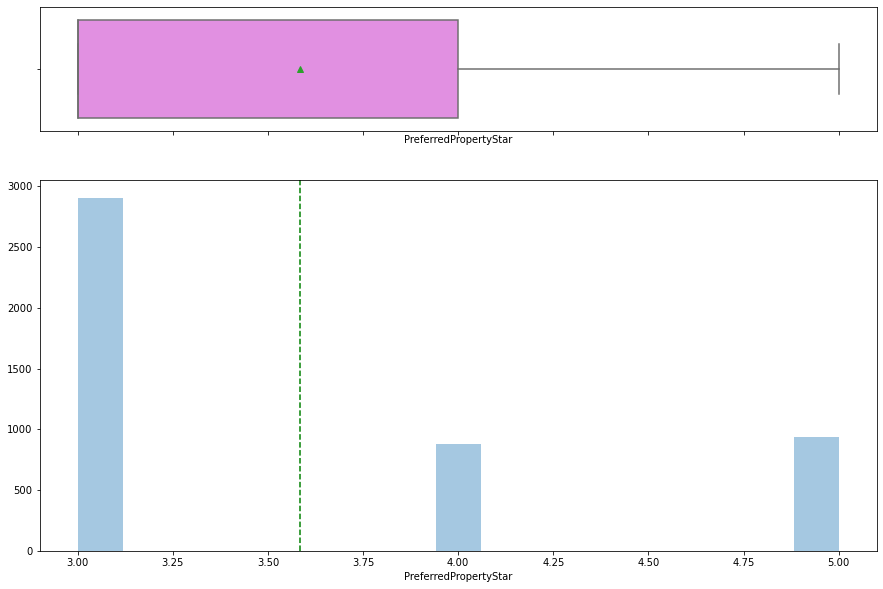

In [27]:
    histogram_boxplot(data['PreferredPropertyStar'])

Most customers prefer properties with at least >3 stars

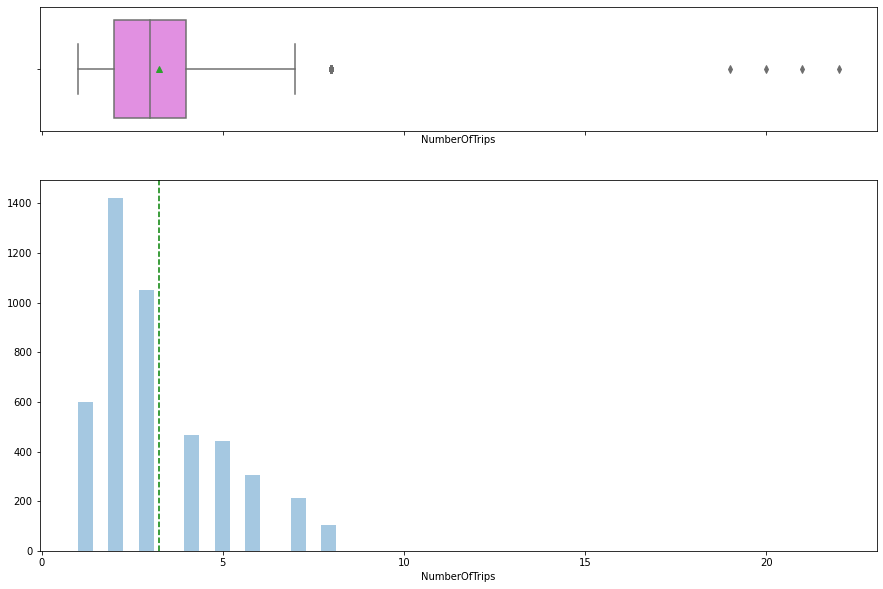

In [28]:
    histogram_boxplot(data['NumberOfTrips'])

Most customers take an average of three trips but the data seems to have few outliers

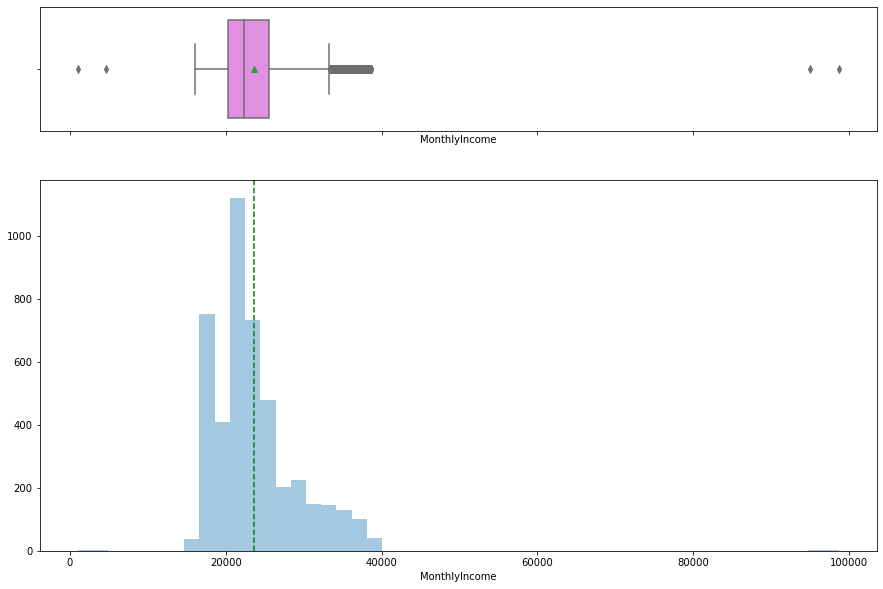

In [29]:
    histogram_boxplot(data['MonthlyIncome'])

Income data rightly skewed with around 20k average income

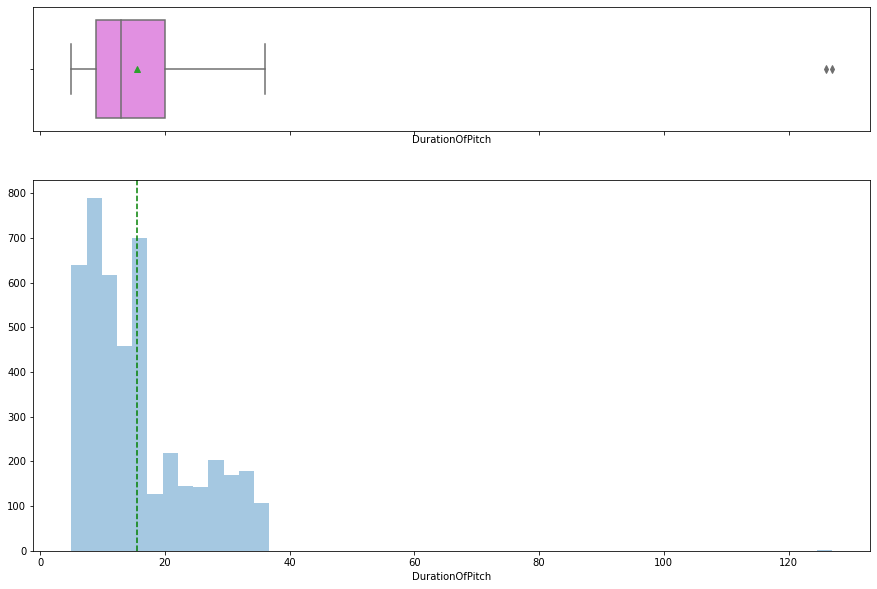

In [30]:
histogram_boxplot(data['DurationOfPitch'])

Duration of pitch is rightly skewed with average around 15 with few outliers

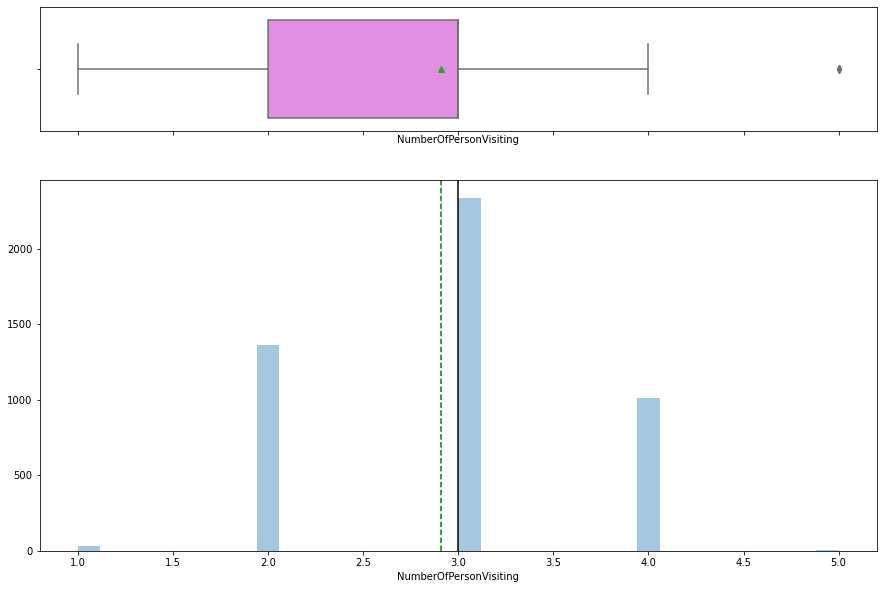

In [31]:
histogram_boxplot(data['NumberOfPersonVisiting'])

Most trips are having at least 3 person 

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

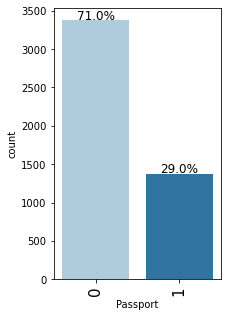

In [33]:
labeled_barplot(data, "Passport", perc=True)

71 percent or two third of customers do not have passport

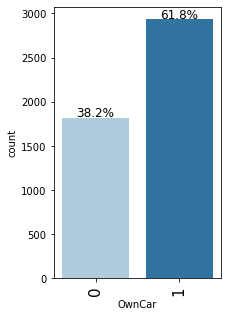

In [34]:
labeled_barplot(data, "OwnCar", perc=True)

Almost two third own a car

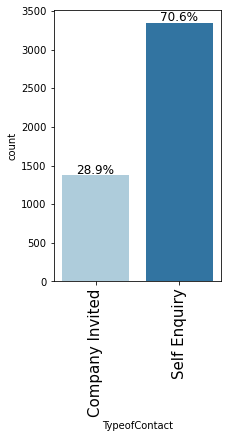

In [35]:
labeled_barplot(data, "TypeofContact", perc=True)

Around 70% customers come through self enquiry

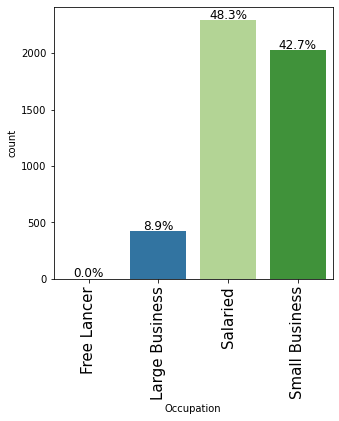

In [36]:
labeled_barplot(data, "Occupation", perc=True)

Majority of customers are from either salaried or small business

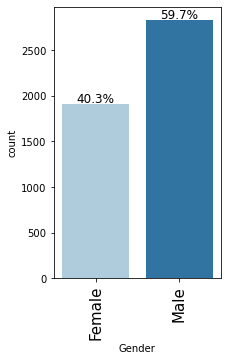

In [37]:
labeled_barplot(data, "Gender", perc=True)

Overall around 60% customers are male

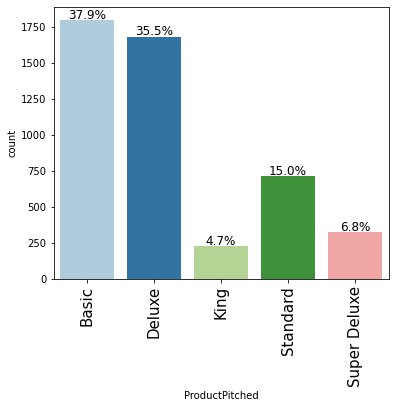

In [38]:
labeled_barplot(data, "ProductPitched", perc=True)

Basic and Deluxe packages are highly pitched

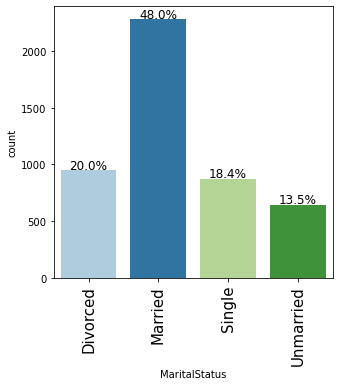

In [39]:
labeled_barplot(data, "MaritalStatus", perc=True)

Almost half of customers are married

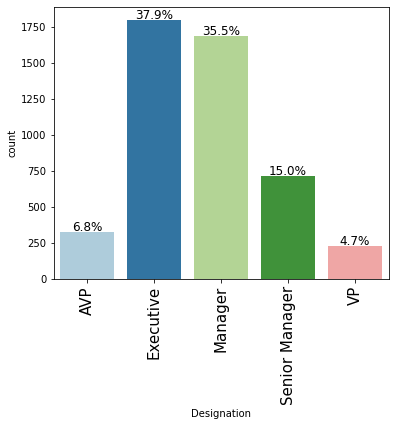

In [40]:
labeled_barplot(data, "Designation", perc=True)

Higher number of customer who purchase packages are executives and managers 

Bivariate Analysis

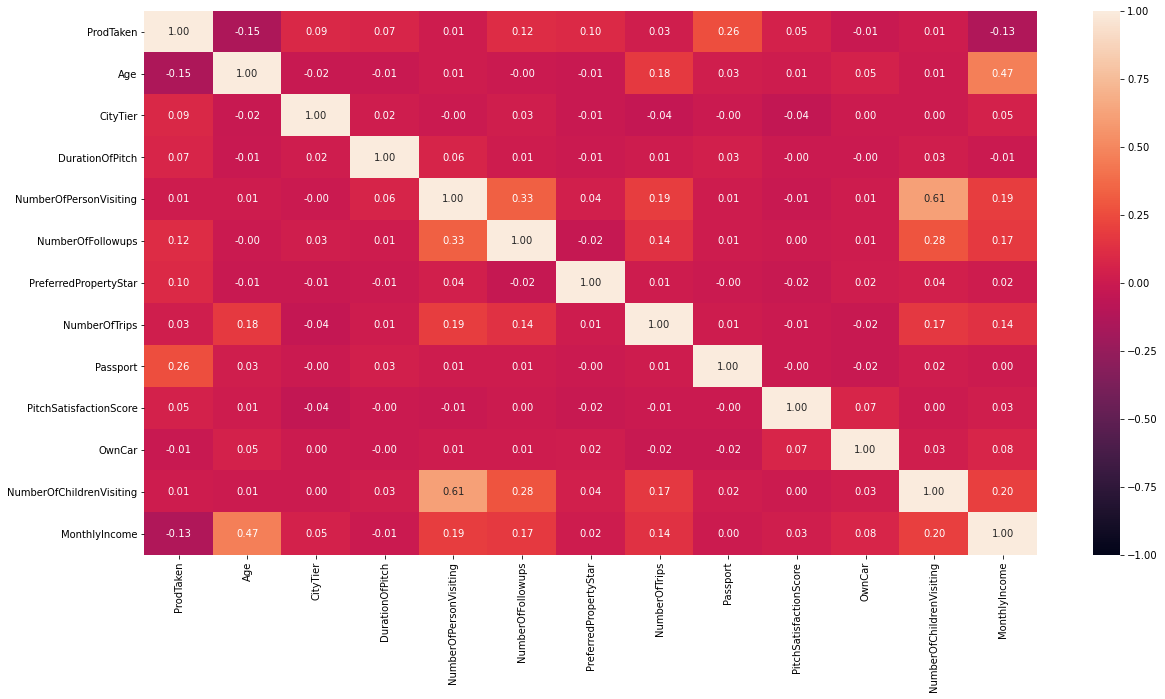

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

* Age and monthly income have positive correlation. 

* Number of persons visiting and number of children visiting have positive correlation

* Passport and ProdTaken also have positive correlation

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken     0    1   All
CityTier                  
All        3853  894  4747
1          2592  506  3098
3          1115  346  1461
2           146   42   188
------------------------------------------------------------------------------------------------------------------------


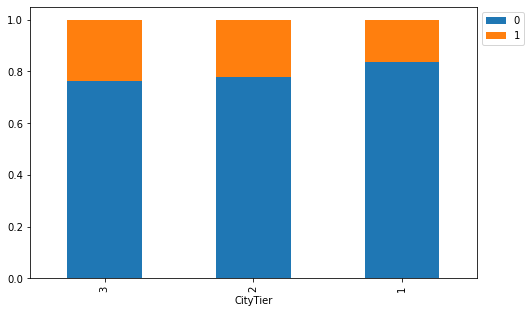

In [43]:
stacked_barplot(data,"CityTier","ProdTaken")

Purchase rate is almost same for tier 2 and 3 but at the same time tier 1 city customers also bought in higher

ProdTaken     0    1   All
OwnCar                    
All        3853  894  4747
1          2390  542  2932
0          1463  352  1815
------------------------------------------------------------------------------------------------------------------------


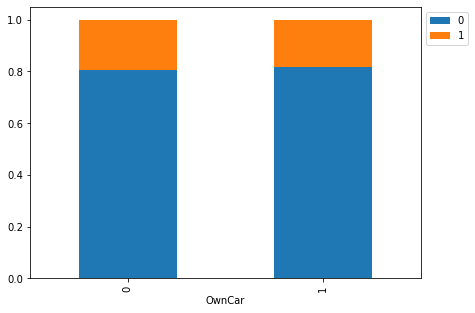

In [44]:
stacked_barplot(data,"OwnCar","ProdTaken")

Both customer with and without car purchased travel packages equally equally 

ProdTaken          0    1   All
Occupation                     
All             3853  894  4747
Salaried        1893  400  2293
Small Business  1654  374  2028
Large Business   306  118   424
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


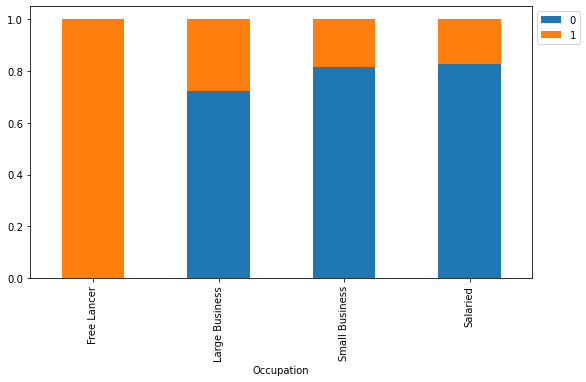

In [45]:
stacked_barplot(data,"Occupation","ProdTaken")

Number os customers are higher in Salaried and Small Business who took earlier packages. 
We can also see large businesses are purchasing packages from "Visit with us"

ProdTaken     0    1   All
Gender                    
All        3853  894  4747
Male       2273  562  2835
Female     1580  332  1912
------------------------------------------------------------------------------------------------------------------------


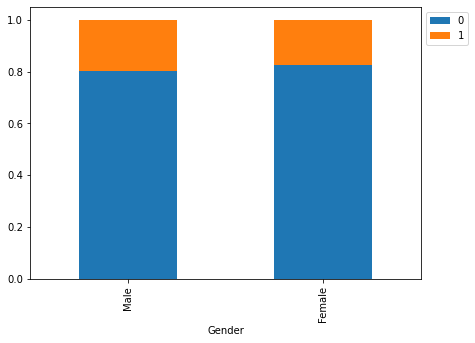

In [46]:
stacked_barplot(data,"Gender","ProdTaken")

Both male and female customers took earlier tavel packages almost equally

ProdTaken         0    1   All
MaritalStatus                 
All            3853  894  4747
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


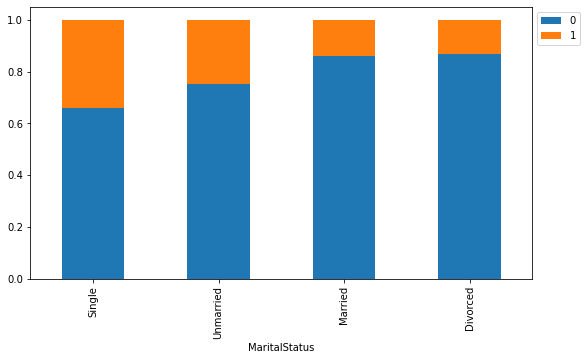

In [47]:
stacked_barplot(data,"MaritalStatus","ProdTaken")

Singles customers are highest percentage previous package takers. 

ProdTaken          0    1   All
Designation                    
All             3853  894  4747
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324
------------------------------------------------------------------------------------------------------------------------


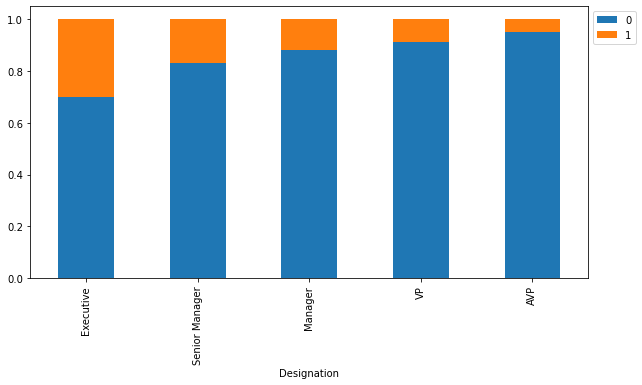

In [48]:
stacked_barplot(data,"Designation","ProdTaken")

Executives and Managers purchase packages in higher number

Designation     AVP  Executive  Manager  Senior Manager   VP   All
ProductPitched                                                    
King              0          0        0               0  225   225
All             324       1800     1684             714  225  4747
Basic             0       1800        0               0    0  1800
Deluxe            0          0     1684               0    0  1684
Standard          0          0        0             714    0   714
Super Deluxe    324          0        0               0    0   324
------------------------------------------------------------------------------------------------------------------------


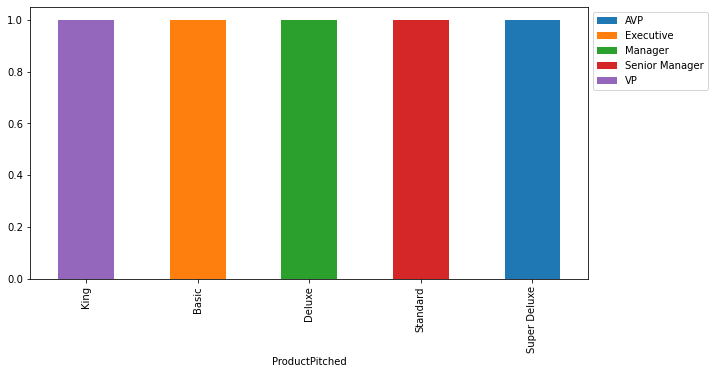

In [49]:
stacked_barplot(data, "ProductPitched", "Designation")

Executives pitched with basic packages while managers pitched for deluxe packages

MaritalStatus   Divorced  Married  Single  Unmarried   All
ProductPitched                                            
All                  950     2279     875        643  4747
Deluxe               336      838     206        304  1684
Basic                332      794     497        177  1800
Standard             142      366      50        156   714
Super Deluxe          88      158      72          6   324
King                  52      123      50          0   225
------------------------------------------------------------------------------------------------------------------------


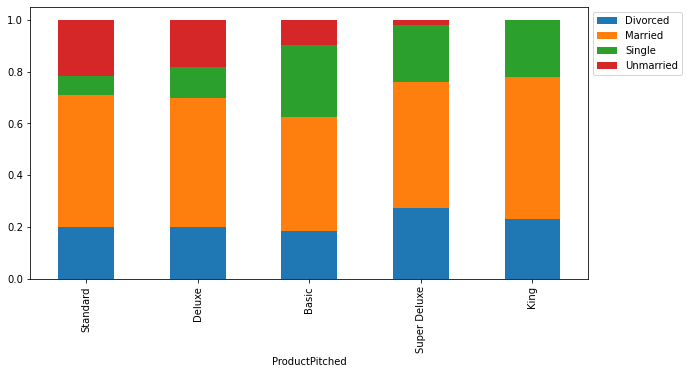

In [50]:
stacked_barplot(data, "ProductPitched", "MaritalStatus")

Singles choose basic as well as King almost equally. At the same time all packages equally attract all groups

Gender                 Female  Male   All
PreferredPropertyStar                    
All                      1900  2821  4721
3.0                      1137  1768  2905
5.0                       389   549   938
4.0                       374   504   878
------------------------------------------------------------------------------------------------------------------------


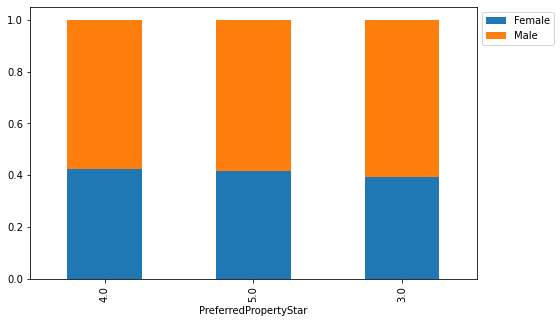

In [51]:
stacked_barplot(data, "PreferredPropertyStar", "Gender")

We do not see major preference diffrence when it comes to property rating among male and female travellers

Occupation             Free Lancer  Large Business  Salaried  Small Business  \
PreferredPropertyStar                                                          
3.0                              2             254      1457            1192   
All                              2             422      2277            2020   
4.0                              0              88       379             411   
5.0                              0              80       441             417   

Occupation              All  
PreferredPropertyStar        
3.0                    2905  
All                    4721  
4.0                     878  
5.0                     938  
------------------------------------------------------------------------------------------------------------------------


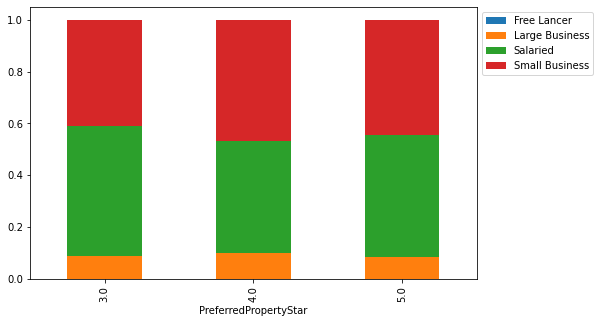

In [52]:
stacked_barplot(data, "PreferredPropertyStar", "Occupation")

Few Observations from EDA

In [ ]:
* Property star rating preference do not have much diffrence between male,female customes
* Executives prefer basic but VP's prefer King packages
* Car ownership is not making much diffrence for product purchase
* Salaried and Small business are major share of customers in the past

# 4   Data Preparation, Missing Value and Outlier Treatment

In [53]:
data['Age'].fillna(float(data['Age'].median()), inplace=True)

In [54]:
data['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry', nan], dtype=object)

In [55]:
#Small number of type of contact and drop these records
data.dropna(subset=["TypeofContact"], inplace=True)

In [56]:
data['DurationOfPitch'].unique()

array([ 11.,  16.,   9.,   6.,  20.,  14.,  15.,   8.,  nan,  10.,  28.,
        12.,  31.,   7.,  21.,  27.,  17.,  29.,  32.,   5.,  13.,  18.,
        24.,  25.,  22.,  19.,  26.,  23.,  33.,  30.,  34.,  36.,  35.,
       127., 126.])

Two records with duration 126 and 127 out of range and probably outliers. Drop both records

In [57]:
data.drop(data[data.DurationOfPitch >=126.0].index, inplace=True)

In [58]:
data['DurationOfPitch'].fillna(int(data['DurationOfPitch'].mean()), inplace=True)

In [59]:
data['NumberOfFollowups'].fillna(int(data['NumberOfFollowups'].mean()), inplace=True)

In [60]:
data['PreferredPropertyStar'].fillna(int(data['PreferredPropertyStar'].median()), inplace=True)

In [61]:
data['NumberOfTrips'].fillna(int(data['NumberOfTrips'].mean()), inplace=True)

In [62]:
data['NumberOfChildrenVisiting'].fillna(int(data['NumberOfChildrenVisiting'].median()), inplace=True)

In [63]:
data.shape

(4720, 19)

In [64]:
data['MonthlyIncome'].fillna(data.groupby('Designation')['MonthlyIncome'].transform('median'),inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 1927 to 2435
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4720 non-null   int64  
 1   Age                       4720 non-null   float64
 2   TypeofContact             4720 non-null   object 
 3   CityTier                  4720 non-null   int64  
 4   DurationOfPitch           4720 non-null   float64
 5   Occupation                4720 non-null   object 
 6   Gender                    4720 non-null   object 
 7   NumberOfPersonVisiting    4720 non-null   int64  
 8   NumberOfFollowups         4720 non-null   float64
 9   ProductPitched            4720 non-null   object 
 10  PreferredPropertyStar     4720 non-null   float64
 11  MaritalStatus             4720 non-null   object 
 12  NumberOfTrips             4720 non-null   float64
 13  Passport                  4720 non-null   int64  
 14  Pitch

In [66]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [67]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 1927 to 2435
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4720 non-null   int64   
 1   Age                       4720 non-null   float64 
 2   TypeofContact             4720 non-null   category
 3   CityTier                  4720 non-null   int64   
 4   DurationOfPitch           4720 non-null   float64 
 5   Occupation                4720 non-null   category
 6   Gender                    4720 non-null   category
 7   NumberOfPersonVisiting    4720 non-null   int64   
 8   NumberOfFollowups         4720 non-null   float64 
 9   ProductPitched            4720 non-null   category
 10  PreferredPropertyStar     4720 non-null   float64 
 11  MaritalStatus             4720 non-null   category
 12  NumberOfTrips             4720 non-null   float64 
 13  Passport                  4720 non-null   int

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4720.0,0.188771,0.391368,0.0,0.0,0.0,0.00,1.0
Age,4720.0,37.549788,9.119283,18.0,31.0,36.0,43.00,61.0
CityTier,4720.0,1.654661,0.917109,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4720.0,15.440042,8.016367,5.0,9.0,14.0,19.00,36.0
NumberOfPersonVisiting,4720.0,2.915042,0.723904,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4720.0,3.700847,1.004714,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4720.0,3.581144,0.799306,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4720.0,3.227966,1.821367,1.0,2.0,3.0,4.00,22.0
Passport,4720.0,0.291314,0.454416,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4720.0,3.053814,1.369941,1.0,2.0,3.0,4.00,5.0


In [70]:
data.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4720,2,Self Enquiry,3350
Occupation,4720,4,Salaried,2286
Gender,4720,2,Male,2818
ProductPitched,4720,5,Basic,1788
MaritalStatus,4720,4,Married,2262
Designation,4720,5,Executive,1788


In [71]:
cols_cat= data.select_dtypes(['category'])

In [72]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3350
Company Invited    1370
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2286
Small Business    2008
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2818
Female    1902
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1788
Deluxe          1669
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2262
Divorced      944
Single        871
Unmarried     643
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1788
Man

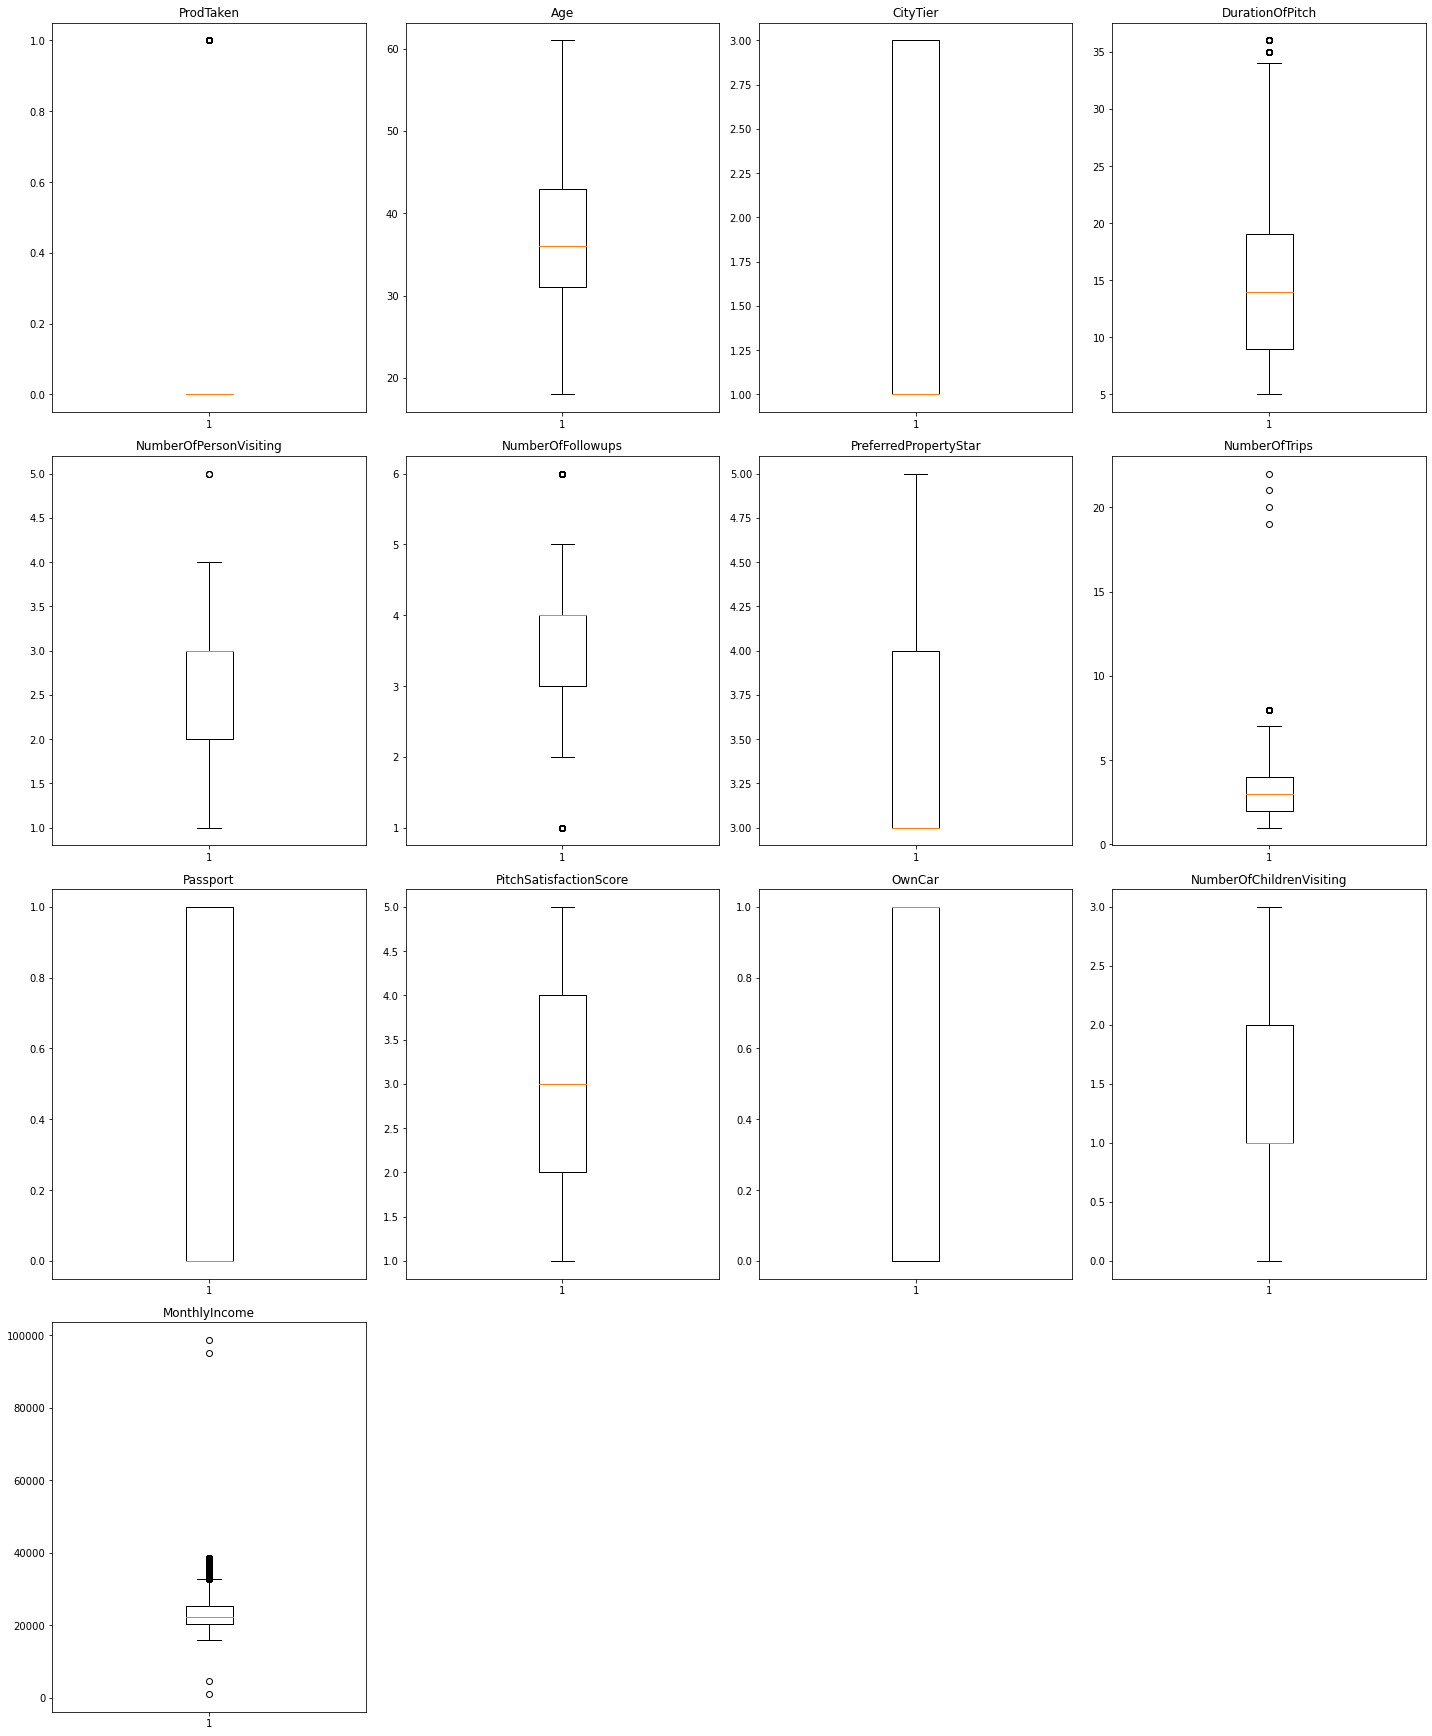

In [73]:
#Identify outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [75]:
replaceStruct = {
                "TypeofContact":{"Self Enquiry": 1, "Company Invited": 2 },
                "Gender":{"Male": 1, "Female": 2 },
                "MaritalStatus":     {"Married": 1, "Divorced": 2 ,"Single": 3 ,"Unmarried":4},
                "Designation": {"Executive": 1, "Manager":2 , "Senior Manager": 3, "AVP": 4,"VP": 5}
                    }

In [76]:
oneHotCols=["Occupation","ProductPitched"]

In [77]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,...,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
1927,1,18.0,2,3,11.0,1,3,3.0,4.0,3,...,16878.0,0,0,0,1,1,0,0,0,0
457,1,18.0,2,3,11.0,1,3,3.0,4.0,3,...,16878.0,0,0,0,1,1,0,0,0,0
301,0,18.0,1,3,16.0,2,3,4.0,3.0,3,...,16200.0,0,0,0,1,1,0,0,0,0
1766,1,18.0,1,1,9.0,1,2,3.0,3.0,3,...,16420.0,0,0,0,1,1,0,0,0,0
296,1,18.0,1,1,9.0,1,2,3.0,3.0,3,...,16420.0,0,0,1,0,1,0,0,0,0
972,0,18.0,2,1,6.0,2,3,3.0,3.0,3,...,16611.0,0,0,1,0,1,0,0,0,0
2197,0,18.0,2,1,11.0,1,3,3.0,3.0,3,...,16051.0,0,0,1,0,1,0,0,0,0
1311,0,18.0,2,1,20.0,2,2,3.0,3.0,3,...,16514.0,0,0,0,1,1,0,0,0,0
828,1,18.0,2,1,14.0,1,3,3.0,3.0,3,...,16904.0,0,0,0,1,1,0,0,0,0
727,0,18.0,2,1,11.0,1,3,3.0,3.0,3,...,16051.0,0,0,1,0,1,0,0,0,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 1927 to 2435
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4720 non-null   int64  
 1   Age                          4720 non-null   float64
 2   TypeofContact                4720 non-null   int64  
 3   CityTier                     4720 non-null   int64  
 4   DurationOfPitch              4720 non-null   float64
 5   Gender                       4720 non-null   int64  
 6   NumberOfPersonVisiting       4720 non-null   int64  
 7   NumberOfFollowups            4720 non-null   float64
 8   PreferredPropertyStar        4720 non-null   float64
 9   MaritalStatus                4720 non-null   int64  
 10  NumberOfTrips                4720 non-null   float64
 11  Passport                     4720 non-null   int64  
 12  PitchSatisfactionScore       4720 non-null   int64  
 13  OwnCar         

# 5   Split the data into train and test sets

In [79]:
X = data.drop('ProdTaken',axis=1)
y = data['ProdTaken'] 

In [80]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3304, 25) (1416, 25)


In [81]:
y.value_counts(1)

0    0.811229
1    0.188771
Name: ProdTaken, dtype: float64

In [82]:
y_test.value_counts(1)

0    0.811441
1    0.188559
Name: ProdTaken, dtype: float64

# Model evaluation criterion

Predicting a customer who was going to purchase a travel package as a customer who won't purchase is a revenue loss. Model prediction should help reduce False Negatives. In this case recall should be maximized, greater the recall higher the chances of minimizing the false negatives.

In [83]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

# 6   Building the model

We are going to build three models here - Bagging Classifier, Random Forest Classifier and Decision Tree.

First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.

We will calculate all four metrics - Accuracy, Precision, Recall and F1 score but the metric of interest here is recall.
Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a potential customer as non customer

# 6.1  Bagging  

# Bagging Classifier 

In [85]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [86]:
#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.993947  0.969551    0.99835  0.98374
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.908898  0.625468   0.852041  0.721382


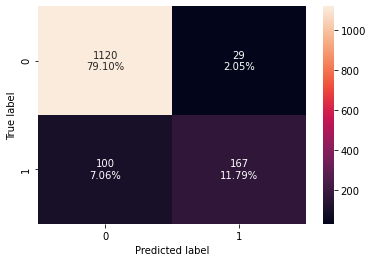

In [87]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

Recall score between train and test data is wide,overfitting and model performance need improvement

# Random Forest Classifier

In [88]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [89]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.918079  0.606742   0.936416  0.736364


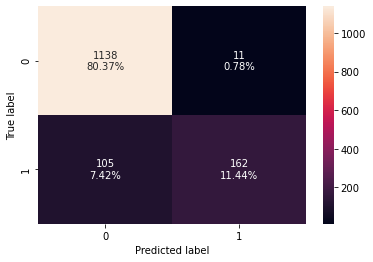

In [90]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

Test data gives good recall score but Trining dataset it is ovefitted

# Decision Tree

In [91]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [92]:
#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.899011  0.734082   0.731343  0.73271


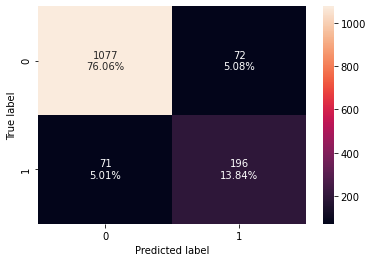

In [93]:
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

We see similar pattern as Random Forest model. Training dataset performance shows this is overfitting 

Observations:-
    Comparing above three models both Random Forest and Decision Tree are overfitted. 
    At the same time Bagging Classifier performance need improvement looking at recall score of
    train and test data

# Tuning Bagging Classifier

In [94]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=50,
                  random_state=1)

In [95]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997881  0.988782        1.0  0.994359
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.920198  0.644195   0.905263  0.752735


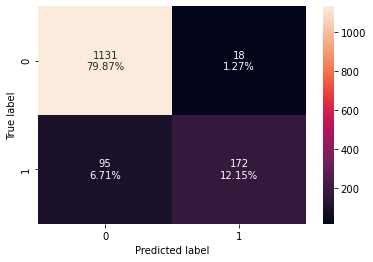

In [96]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

# Tuning Random Forest

In [97]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = {  
                #'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20)#,'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                       max_features=0.8999999999999999,
                       max_samples=0.9999999999999999, min_samples_split=17,
                       n_estimators=50, random_state=1)

In [98]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.960654  0.955128   0.853868  0.901664
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.893362  0.719101   0.716418  0.717757


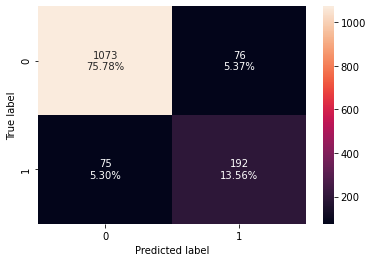

In [99]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

# Tuning Decision Tree

In [101]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15]#,'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_leaf_nodes=15, min_samples_leaf=10, random_state=1)

In [102]:
#Calculating different metrics
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
print("Training performance:\n",dtree_tuned_model_train_perf)
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned,X_test,y_test)
print("Testing performance:\n",dtree_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757869  0.777244   0.423211  0.548023
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72952  0.681648   0.379167  0.487282


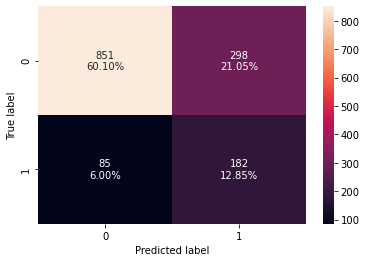

In [103]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

# Comparing all the models

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_tuned_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest ",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,1.0,0.757869,1.0,0.960654,0.993947,0.997881
Recall,1.0,0.777244,1.0,0.955128,0.969551,0.988782
Precision,1.0,0.423211,1.0,0.853868,0.998350,1.000000
F1,1.0,0.548023,1.0,0.901664,0.983740,0.994359


In [105]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_tuned_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest ",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,0.899011,0.729520,0.918079,0.893362,0.908898,0.920198
Recall,0.734082,0.681648,0.606742,0.719101,0.625468,0.644195
Precision,0.731343,0.379167,0.936416,0.716418,0.852041,0.905263
F1,0.732710,0.487282,0.736364,0.717757,0.721382,0.752735


Observations:-
    * By looking at comparision we can clearly see all metrics improved after tuning
    * Random Foreset after tuning shows better comparision results between Train and Test datasets but data is overfitted with the training dataset
    * Comparing all models Decision Tree recall score after tuning performance looks better overall
    

# 6.2  Boosting

# AdaBoost Classifier

In [106]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [107]:
#Calculating different metrics
abc_model_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance:\n",abc_model_train_perf)
abc_model_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
print("Testing performance:\n",abc_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.846247  0.365385   0.670588  0.473029
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.84322  0.337079   0.666667  0.447761


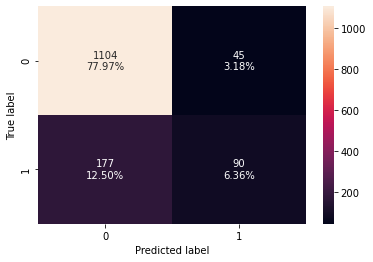

In [108]:
#Creating confusion matrix
confusion_matrix_sklearn(abc, X_test, y_test)

# Gradient Boosting Classifier

In [109]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [110]:
#Calculating different metrics
gbc_model_train_perf=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance:\n",gbc_model_train_perf)
gbc_model_test_perf=model_performance_classification_sklearn(gbc,X_test,y_test)
print("Testing performance:\n",gbc_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.892252  0.501603   0.874302  0.637475
Testing performance:
    Accuracy    Recall  Precision    F1
0  0.864407  0.389513   0.781955  0.52


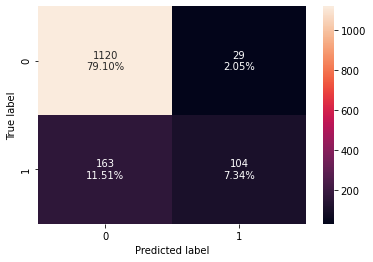

In [111]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc, X_test, y_test)

# XGBoost Classifier

In [112]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
#Calculating different metrics
xgb_model_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_model_train_perf)
xgb_model_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Testing performance:\n",xgb_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999697  0.998397        1.0  0.999198
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.920904  0.670412   0.881773  0.761702


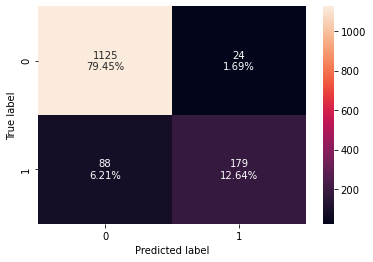

In [114]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb, X_test, y_test)

# Hyperparameter Tuning

# AdaBoost Classifier

In [115]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

In [116]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996671  0.985577   0.996759  0.991136
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877119  0.561798   0.724638  0.632911


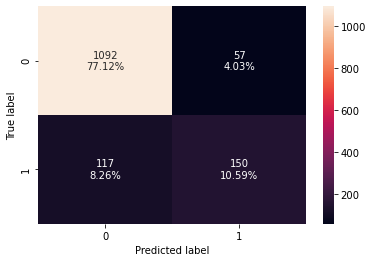

In [117]:
#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

# Gradient Boosting Classifier

In [118]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.7,0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [119]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision      F1
0  0.933111  0.685897   0.944812  0.7948
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877119  0.475655    0.78882  0.593458


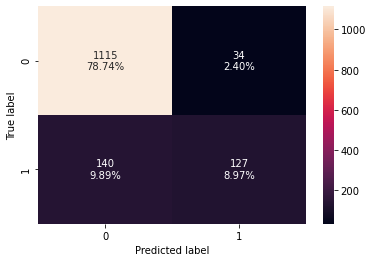

In [120]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

# Stacking Classifier

In [121]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_tuned)]

final_estimator = gbc_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_features=0.8999999999999999,
                                                       max_samples=0.9999999999999999,
                                                       min_samples_split=17,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                 

In [122]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.967918  0.911859   0.917742  0.914791
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.899718  0.629213   0.796209  0.702929


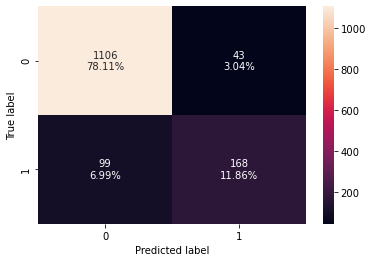

In [123]:
#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_tuned_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,abc_model_train_perf.T,
     abc_tuned_model_train_perf.T,gbc_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_model_train_perf.T,
     stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.757869,1.0,0.960654,0.993947,0.997881,0.846247,0.996671,0.892252,0.933111,0.999697,0.967918
Recall,1.0,0.777244,1.0,0.955128,0.969551,0.988782,0.365385,0.985577,0.501603,0.685897,0.998397,0.911859
Precision,1.0,0.423211,1.0,0.853868,0.998350,1.000000,0.670588,0.996759,0.874302,0.944812,1.000000,0.917742
F1,1.0,0.548023,1.0,0.901664,0.983740,0.994359,0.473029,0.991136,0.637475,0.794800,0.999198,0.914791


In [126]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_tuned_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,abc_model_test_perf.T,
     abc_tuned_model_test_perf.T,gbc_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_model_test_perf.T,
     stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,0.899011,0.729520,0.918079,0.893362,0.908898,0.920198,0.843220,0.877119,0.864407,0.877119,0.920904,0.899718
Recall,0.734082,0.681648,0.606742,0.719101,0.625468,0.644195,0.337079,0.561798,0.389513,0.475655,0.670412,0.629213
Precision,0.731343,0.379167,0.936416,0.716418,0.852041,0.905263,0.666667,0.724638,0.781955,0.788820,0.881773,0.796209
F1,0.732710,0.487282,0.736364,0.717757,0.721382,0.752735,0.447761,0.632911,0.520000,0.593458,0.761702,0.702929


Most models are overfitting the training data in terms of Recall score.
The Random Forest tuned is giving the highest Recall score on the test data but is overfitting the training data.
The Decision Tree after tuning has given the second-highest test Recall score and is giving a more generalized performance as compared to the Random Forest.

# Feature importance of Tuned Decision Tree

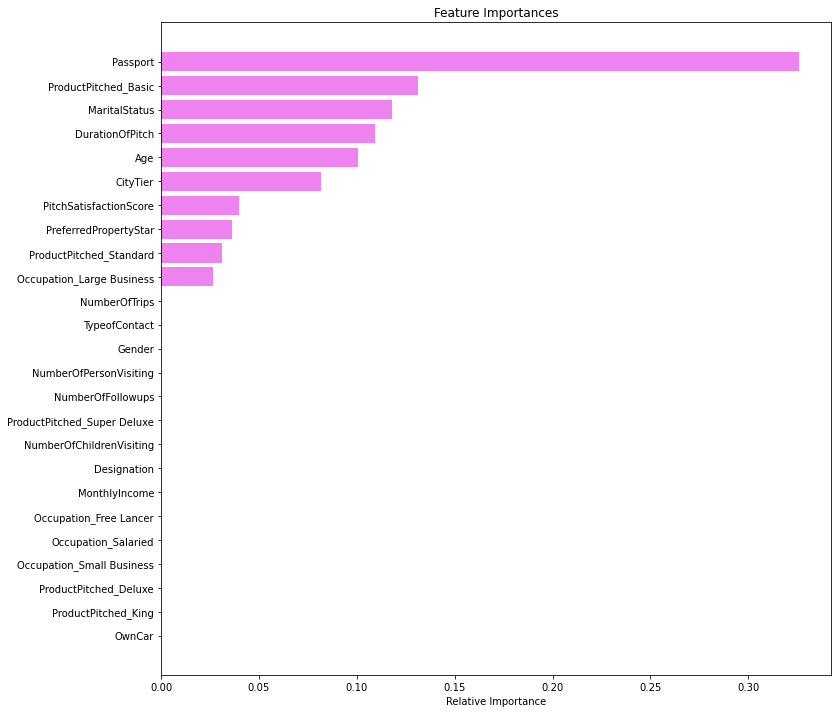

In [131]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport is the most important feature to attract more customers to take the travel packages

# Recommendations

In [ ]:
Based on our analysis, we can say that in order to convince more customers to take travle packages offered:
    
* Offer Passport Service
* Focus on pitching basic packages to more would be customers
* Target more married customers
* Increase pitch time
* Focus more on the age of customers
* Targeting specific city tier customers

The company should focus more on the above mentioned variables. Adjusting those variables to find desired performance level 
and targeting those customers will benefit "Visit with us" to expand thier business 